In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_excel("Employees.xlsx")

In [3]:
# Drop irrelevant columns
df = df.drop(columns=["No", "First Name", "Last Name", "Start Date", "Monthly Salary"], errors='ignore')

In [4]:
# Encode categorical columns
cat_cols = ["Gender", "Department", "Country", "Center"]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

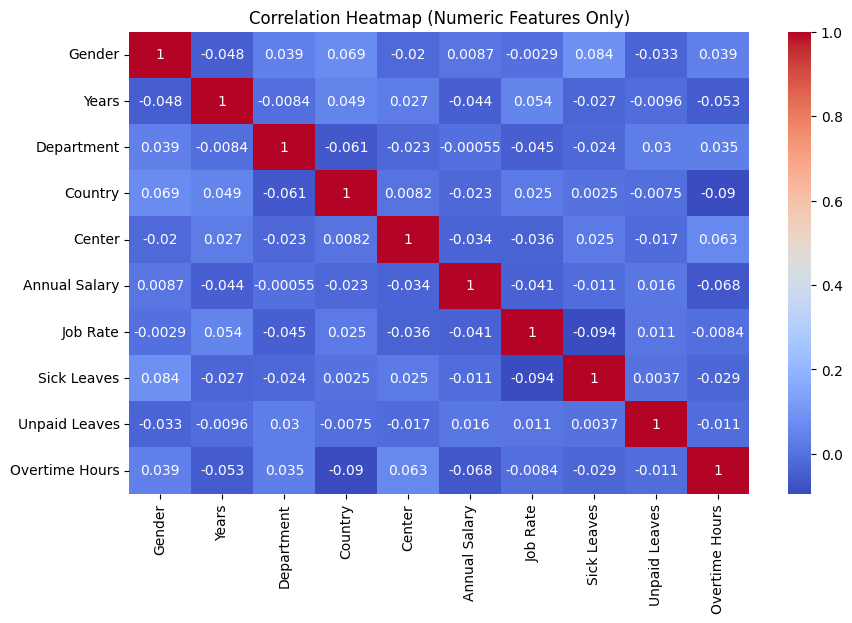

In [5]:
# Step 3: Correlation Heatmap
# ======================================
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [6]:
# Step 4: Split Data
# ======================================
X = df.drop(columns=["Annual Salary"])
y = df["Annual Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 5: Train Models
# ======================================
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
gb_model = GradientBoostingRegressor(random_state=42)

models = {
    "Linear Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

for name, model in models.items():
    model.fit(X_train, y_train)


📊 Linear Regression Performance:
MAE : 8562.14
RMSE: 9669.77
R²  : -0.07

📊 Decision Tree Performance:
MAE : 10510.87
RMSE: 13378.87
R²  : -1.04

📊 Random Forest Performance:
MAE : 8568.32
RMSE: 9987.71
R²  : -0.14

📊 Gradient Boosting Performance:
MAE : 8725.62
RMSE: 10035.00
R²  : -0.15


,Model,MAE,RMSE,R2
0,Linear Regression,8562.143835,9669.772107,-0.065093
2,Random Forest,8568.321362,9987.707214,-0.136283
3,Gradient Boosting,8725.619485,10035.003533,-0.147071
1,Decision Tree,10510.869565,13378.869088,-1.038890


C:\Users\arvin\AppData\Local\Temp\ipykernel_21584\2966432527.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=results_df, palette="viridis")


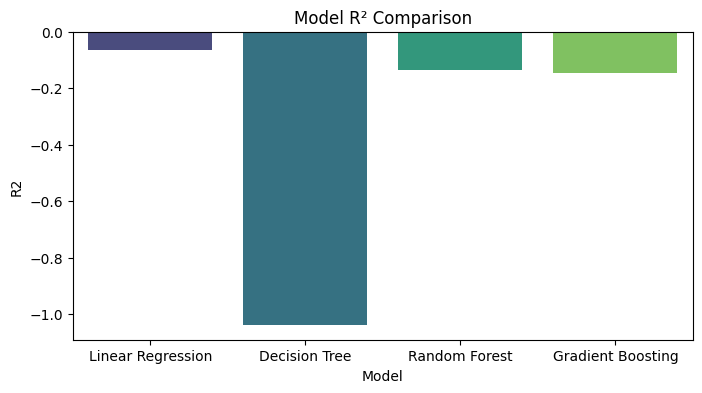

In [8]:
# Step 6: Evaluate Models
# ======================================
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Performance:")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.2f}")
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R2": r2}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append(evaluate_model(y_test, y_pred, name))

results_df = pd.DataFrame(results)
display(results_df.sort_values(by="R2", ascending=False))

plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="R2", data=results_df, palette="viridis")
plt.title("Model R² Comparison")
plt.show()


In [9]:
# Step 7: Save Best Model
# ======================================
best_model_name = results_df.loc[results_df["R2"].idxmax(), "Model"]
best_model = models[best_model_name]

print(f"\n🏆 Best Model Selected: {best_model_name}")
joblib.dump(best_model, "best_salary_model.pkl")
print("✅ Best model saved as 'best_salary_model.pkl'")



🏆 Best Model Selected: Linear Regression
✅ Best model saved as 'best_salary_model.pkl'


In [11]:
# Step 8: Predict for New Employee
# ======================================
new_data = pd.DataFrame({
    "Gender": [1],
    "Years": [3],
    "Department": [2],
    "Country": [1],
    "Center": [0],
    "Job Rate": [2.0],
    "Sick Leaves": [1],
    "Unpaid Leaves": [0],
    "Overtime Hours": [120]
})

predicted_salary = best_model.predict(new_data)
print(f"\n💰 Predicted Annual Salary (using {best_model_name}): ₹{predicted_salary[0]:,.2f}")



💰 Predicted Annual Salary (using Linear Regression): ₹21,121.76
